In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_pairs
from deepface import DeepFace

In [21]:
lfw_faces = fetch_lfw_pairs(subset='test',resize=1,color=True,data_home="./Faces")

In [22]:
samples = np.random.choice(1000,size=100,replace=False)
pairs = lfw_faces["pairs"][samples]
target = lfw_faces["target"][samples]

In [23]:
pairs.shape

(100, 2, 125, 94, 3)

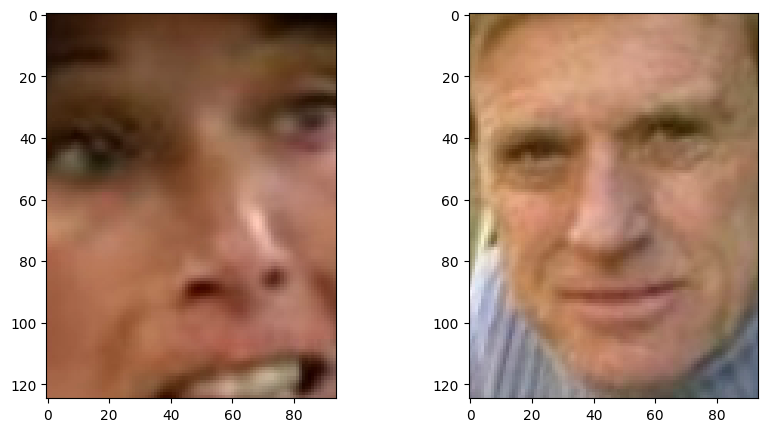

0


In [24]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(pairs[0][0]/255)
axes[1].imshow(pairs[0][1]/255)
plt.show()
print(target[0])

In [30]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]


predicted = []
for model in models:
    print(f"Current Model: {model}")
    predicted.append([])
    for img1, img2 in pairs:

        predicted[-1].append(
            DeepFace.verify(img1_path=img1,img2_path=img2,model_name=model,enforce_detection=False)["verified"]+0)
        
    print(f"{model} ended")

Current Model: VGG-Face
1/1 [==============================] - 0s 211ms/step


1/1 [==============================] - 0s 212ms/step
VGG-Face ended
Current Model: Facenet
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step
Facenet ended
Current Model: Facenet512
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step
Facenet512 ended
Current Model: OpenFace
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step
OpenFace ended
Current Model: DeepFace
1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step
DeepFace ended
Current Model: DeepID
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step
DeepID ended
Current Model: ArcFace
1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step
ArcFace ended
Current Model: Dlib
Dlib ended
Current Model: SFace
SFace ended


In [31]:
from sklearn.metrics import classification_report

for model, predicte in zip(models,predicted):
    print(f"Model: {model}")
    print(f"Classification report:\n{classification_report(predicte,target)}")

Model: VGG-Face
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81        41
           1       0.98      0.69      0.81        59

    accuracy                           0.81       100
   macro avg       0.83      0.84      0.81       100
weighted avg       0.86      0.81      0.81       100

Model: Facenet
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        68
           1       0.76      1.00      0.86        32

    accuracy                           0.90       100
   macro avg       0.88      0.93      0.89       100
weighted avg       0.92      0.90      0.90       100

Model: Facenet512
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        77
           1       0.55      1.00      0.71        23

    accuracy                           0.81       100
   macro a